In [7]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [8]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
interval = '1h'

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end, interval=interval)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
2022-08-01 14:30:00-04:00,135.360001,136.250000,135.179993,135.259995,135.259995,6799921,AMAZON
2022-08-01 15:30:00-04:00,135.250000,135.880005,135.240005,135.440002,135.440002,5735285,AMAZON
2022-08-02 09:30:00-04:00,135.089996,136.669998,134.460007,135.683395,135.683395,17762842,AMAZON
2022-08-02 10:30:00-04:00,135.699997,136.649994,135.119995,135.949997,135.949997,8368228,AMAZON
2022-08-02 11:30:00-04:00,135.960007,137.440002,135.470001,137.250000,137.250000,7265101,AMAZON
2022-08-02 12:30:00-04:00,137.250000,137.360703,135.339996,135.440002,135.440002,6385066,AMAZON
2022-08-02 13:30:00-04:00,135.419998,135.419998,134.330002,134.919998,134.919998,7108656,AMAZON
2022-08-02 14:30:00-04:00,134.929993,135.372498,134.380005,134.800095,134.800095,5343691,AMAZON
2022-08-02 15:30:00-04:00,134.804993,134.990005,134.089996,134.160004,134.160004,5353676,AMAZON
2022-08-02 16:00:00-04:00,134.160004,134.160004,134.160004,134.160004,134.160004,0,AMAZON


In [10]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1.763000e+03
mean,156.599780,157.268420,155.942099,156.616557,156.616557,1.097116e+07
std,12.456151,12.506306,12.398451,12.445917,12.445917,6.365339e+06
min,129.729996,130.279999,129.039993,129.735001,129.735001,0.000000e+00
25%,147.101898,147.584999,146.555000,147.130005,147.130005,6.821182e+06
50%,154.110001,154.660004,153.574997,154.119995,154.119995,9.044778e+06
75%,167.725494,168.472496,166.764999,167.610001,167.610001,1.302524e+07
max,182.630005,182.940002,181.809998,182.250000,182.250000,5.708336e+07


In [11]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1763 entries, 2021-08-02 15:30:00-04:00 to 2022-08-02 16:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1763 non-null   float64
 1   High          1763 non-null   float64
 2   Low           1763 non-null   float64
 3   Close         1763 non-null   float64
 4   Adj Close     1763 non-null   float64
 5   Volume        1763 non-null   int64  
 6   company_name  1763 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 110.2+ KB


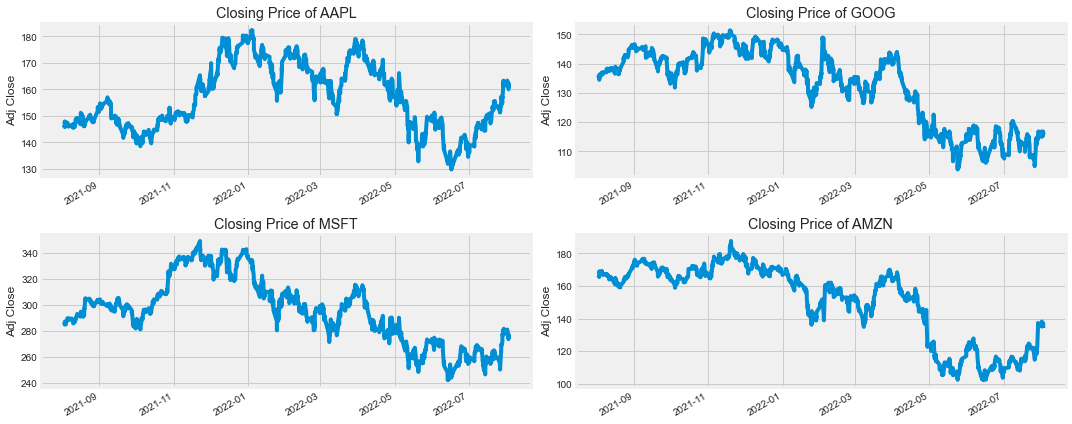

In [12]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

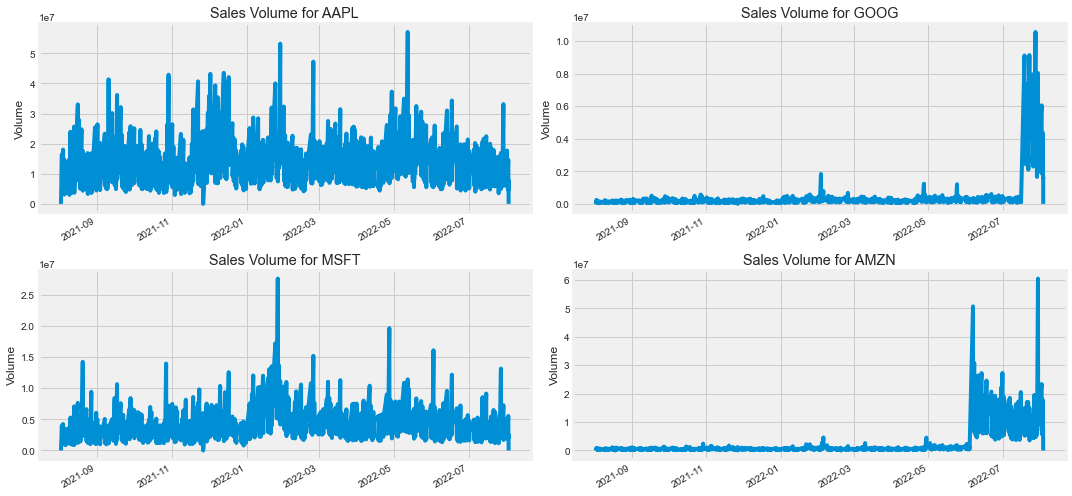

In [13]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

In [14]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

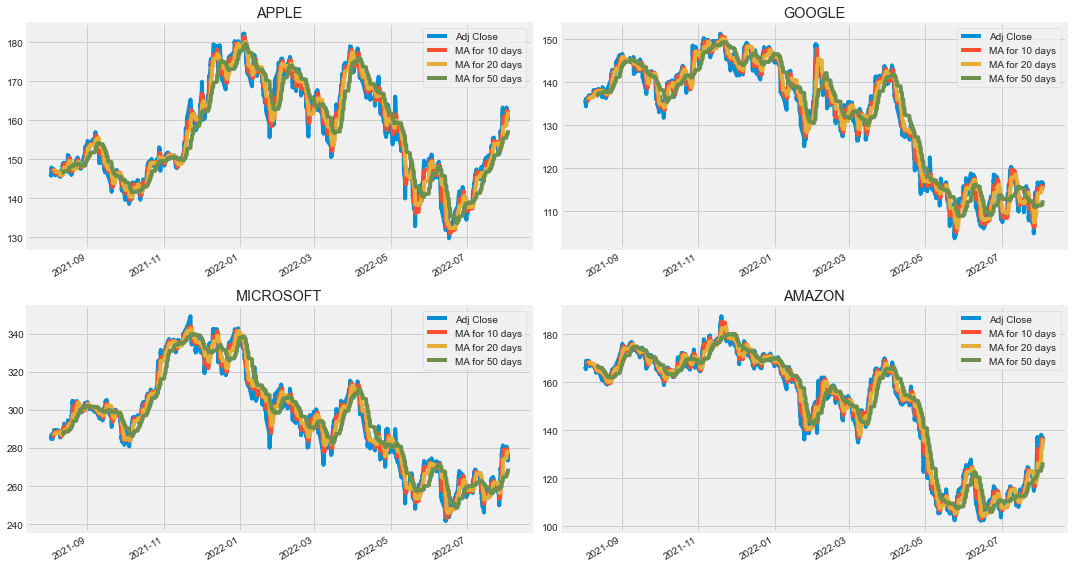

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

[                                 Open        High         Low       Close  \
2021-08-02 15:30:00-04:00  145.610001  145.759995  145.369995  145.520004   
2021-08-03 09:30:00-04:00  145.699997  146.600006  145.179993  146.110001   
2021-08-03 10:30:00-04:00  146.110001  146.149994  145.339905  145.809906   
2021-08-03 11:30:00-04:00  145.800003  147.429993  145.759995  147.070099   
2021-08-03 12:30:00-04:00  147.074005  148.044998  147.070099  147.880005   
...                               ...         ...         ...         ...   
2022-08-02 12:30:00-04:00  162.330002  162.398804  161.080002  161.149994   
2022-08-02 13:30:00-04:00  161.149994  161.149994  160.074997  160.940094   
2022-08-02 14:30:00-04:00  160.955002  161.300003  160.169998  160.527206   
2022-08-02 15:30:00-04:00  160.520004  160.800003  159.929993  159.990005   
2022-08-02 16:00:00-04:00  160.009995  160.009995  160.009995  160.009995   

                            Adj Close    Volume company_name  MA for 10 da

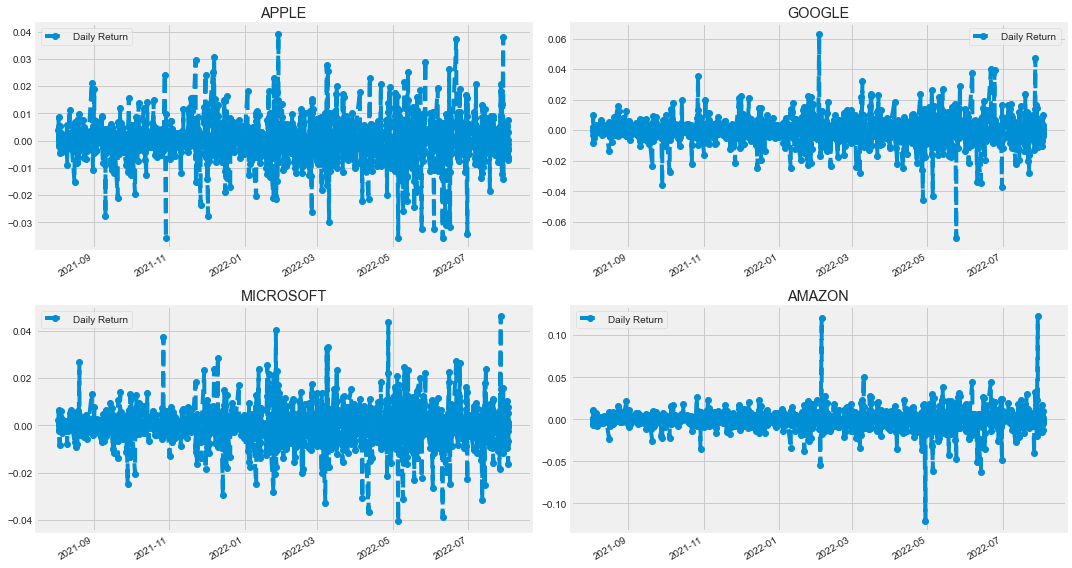

In [16]:
# We'll use pct_change to find the percent change for each day
print(company_list)
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

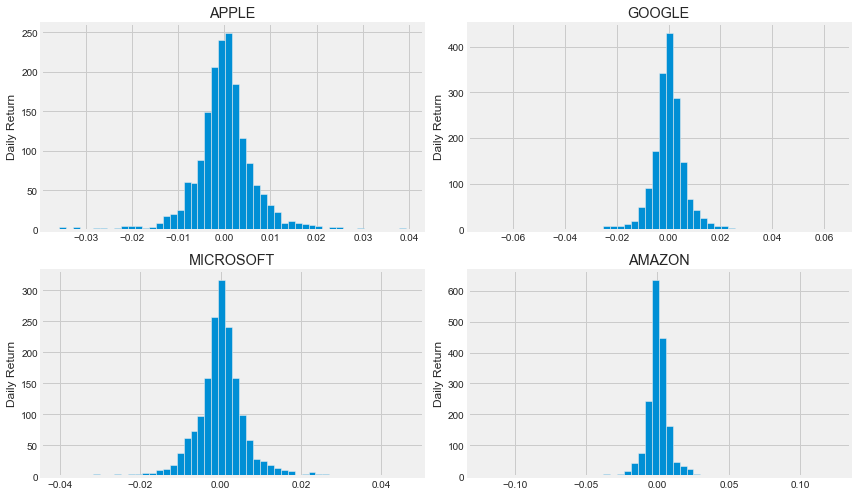

In [58]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

### What was the correlation between different stocks closing prices?


Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.


In [59]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-08-02,144.693329,135.989502,282.513153,166.574005
2021-08-03,146.522888,136.279999,284.794495,168.311996
2021-08-04,146.115204,136.028503,284.189453,167.735992
2021-08-05,146.224579,136.940002,287.175049,168.799500
2021-08-06,145.527527,137.035995,287.115540,167.246994




Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.


In [60]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-08-02,NaN,NaN,NaN,NaN
2021-08-03,0.012644,0.002136,0.008075,0.010434
2021-08-04,-0.002782,-0.001845,-0.002124,-0.003422
2021-08-05,0.000749,0.006701,0.010506,0.006340
2021-08-06,-0.004767,0.000701,-0.000207,-0.009197


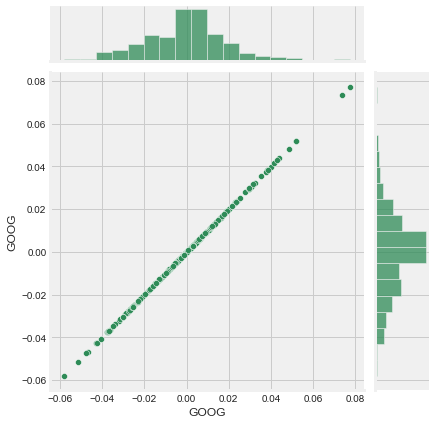

In [61]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

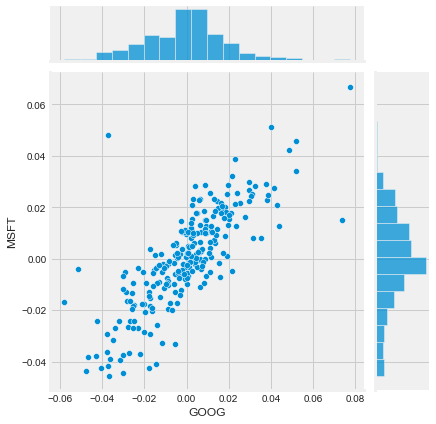

In [62]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

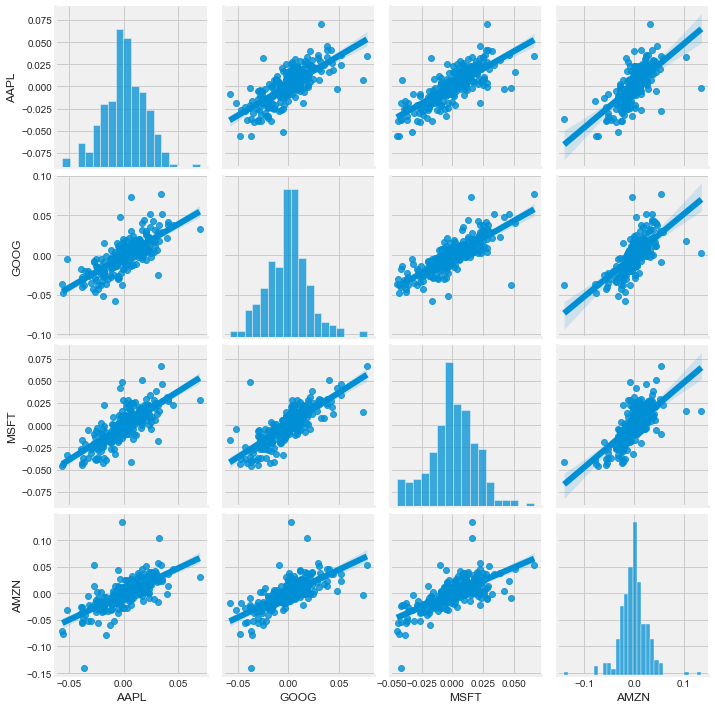

In [16]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

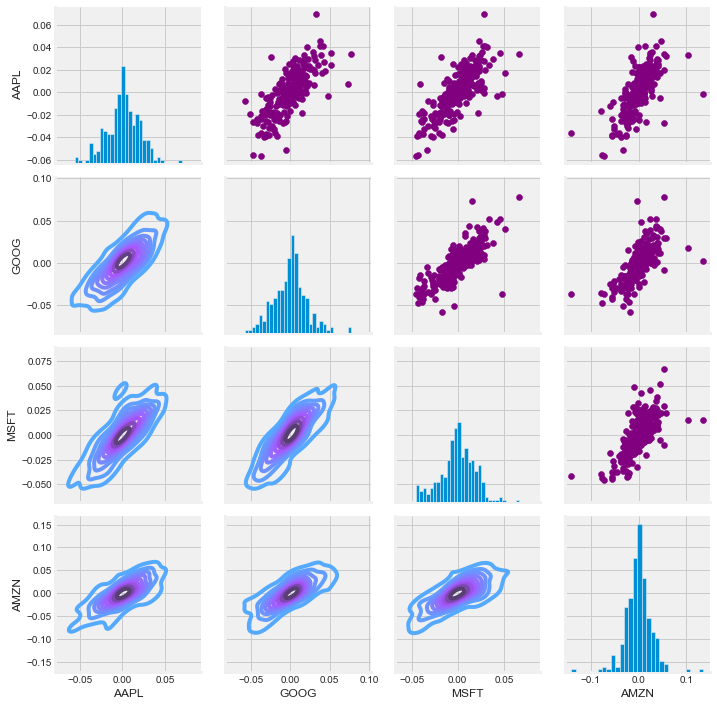

In [17]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

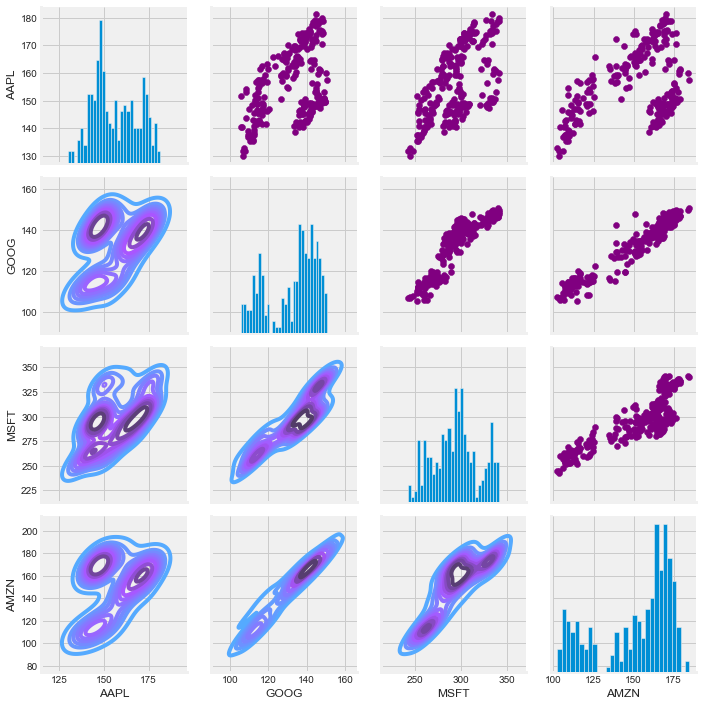

In [18]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

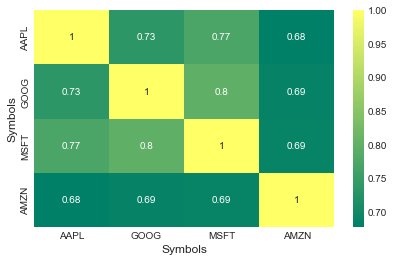

In [63]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

### How much value do we put at risk by investing in a particular stock?


There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.


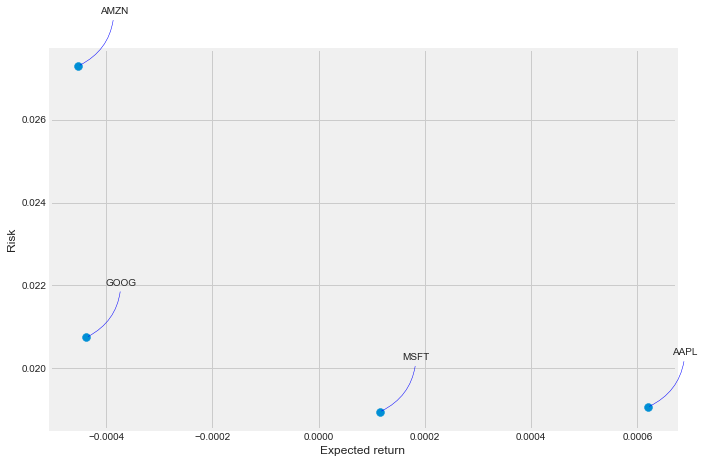

In [64]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

### Predicting the closing price stock price of APPLE inc:

In [134]:
# Get the stock quote
#df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
df = yf.download('AAPL', start='2020-10-01', end=datetime.now(), interval=interval)
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2020-10-01 09:30:00-04:00,117.639999,117.720001,116.160004,116.650101,116.650101,29403530
2020-10-01 10:30:00-04:00,116.654999,117.019997,116.139999,116.650002,116.650002,14012017
2020-10-01 11:30:00-04:00,116.660004,116.879997,115.830002,116.250801,116.250801,12850920
2020-10-01 12:30:00-04:00,116.250000,116.550003,116.010002,116.381500,116.381500,9406569
2020-10-01 13:30:00-04:00,116.391602,116.919998,115.910004,116.410500,116.410500,13462994
...,...,...,...,...,...,...
2022-08-01 13:30:00-04:00,161.520004,161.699997,160.889999,161.610001,161.610001,5945960
2022-08-01 14:30:00-04:00,161.610001,162.250000,161.449997,161.559998,161.559998,6486134
2022-08-01 15:30:00-04:00,161.544998,161.860001,161.190002,161.570007,161.570007,6124723
2022-08-02 09:30:00-04:00,160.031998,160.690002,159.800003,160.460007,160.460007,4038415


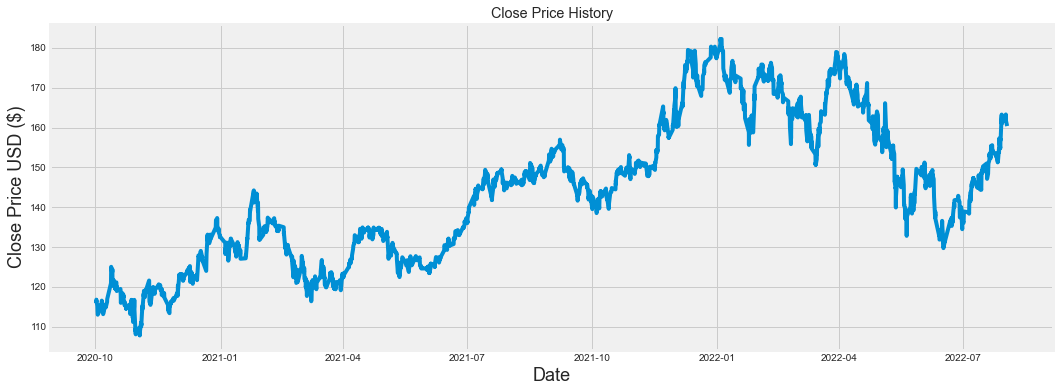

In [135]:
from sqlite3 import Row
from matplotlib.pyplot import bar


plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [136]:
# Create a new dataframe with only the 'Close' and 'volume' column 
data = df.filter(['Close', 'Volume'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3059

In [137]:
# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.11875474, 0.44110779],
       [0.11875341, 0.21020639],
       [0.11339069, 0.19278777],
       ...,
       [0.72219248, 0.09188227],
       [0.70728113, 0.06058376],
       [0.70627344, 0.        ]])

In [138]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, :]) #60 days for test data
    y_train.append(train_data[i, :])
    if i<= 61:
        #print(x_train)
        #print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 2))
x_train.shape

(2999, 60, 2)

In [139]:
# Build the LSTM model
model = Sequential()
model.add(GRU(200, return_sequences=True, input_shape= (x_train.shape[1], 2)))
model.add(GRU(100, return_sequences=True, dropout=0.1))
model.add(GRU(50, return_sequences=True, dropout=0.1))
model.add(GRU(25, return_sequences=False, dropout=0.2))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_53 (GRU)                (None, 60, 200)           122400    
                                                                 
 gru_54 (GRU)                (None, 60, 100)           90600     
                                                                 
 gru_55 (GRU)                (None, 60, 50)            22800     
                                                                 
 gru_56 (GRU)                (None, 25)                5775      
                                                                 
 dense_15 (Dense)            (None, 10)                260       
                                                                 
 dense_16 (Dense)            (None, 2)                 22        
                                                                 
Total params: 241,857
Trainable params: 241,857
Non-t

In [140]:
# Train the model
fit_history = model.fit(x_train, y_train, batch_size=4, epochs=10)

Epoch 1/10
750/750 [==============================] - 48s 58ms/step - loss: 0.0073
Epoch 2/10
750/750 [==============================] - 44s 58ms/step - loss: 0.0055
Epoch 3/10
750/750 [==============================] - 42s 56ms/step - loss: 0.0046
Epoch 4/10
750/750 [==============================] - 42s 56ms/step - loss: 0.0039
Epoch 5/10
223/750 [=======>......................] - ETA: 30s - loss: 0.0036

KeyboardInterrupt: 

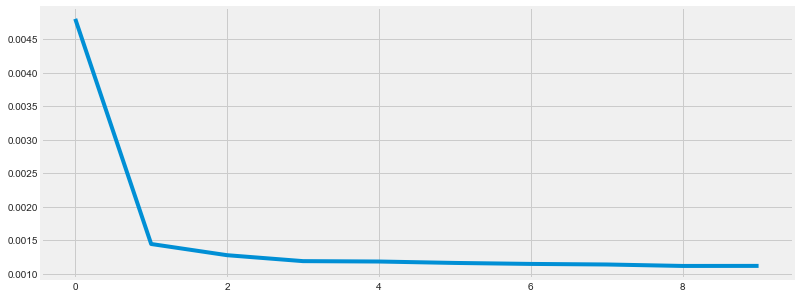

In [131]:
#Draw loss chart
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(fit_history.history['loss'])

In [132]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, :])
    
# Convert the data to a numpy array
x_test = np.array(x_test)
#print(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 2))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(predictions.shape)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 20ms/step


AttributeError: 'Normalizer' object has no attribute 'inverse_transform'

In [113]:
# Predict the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid.insert(2,'Close Prediction', predictions[:,0])
valid.insert(3,'Volume Prediction', predictions[:,1])

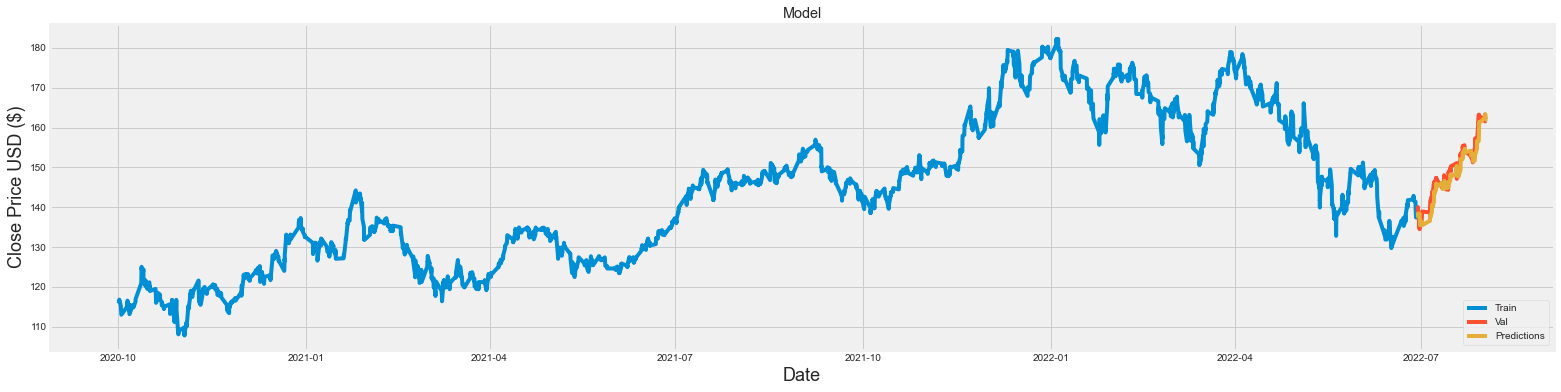

In [114]:
# Visualize the data
plt.figure(figsize=(24,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Close Prediction']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [115]:
# Show the valid and predicted prices
valid

,Close,Volume,Close Prediction,Volume Prediction
2022-06-29 11:30:00-04:00,138.759995,6356298,138.493729,5435641.5
2022-06-29 12:30:00-04:00,139.085007,5679257,138.299469,4532083.5
2022-06-29 13:30:00-04:00,139.884995,6008938,138.409225,4164473.0
2022-06-29 14:30:00-04:00,140.033096,7607954,138.361542,4994731.0
2022-06-29 15:30:00-04:00,139.250000,7830147,137.700958,6246326.5
...,...,...,...,...
2022-08-01 12:30:00-04:00,161.544998,5633706,163.012390,5974809.5
2022-08-01 13:30:00-04:00,161.610001,5945960,163.394714,5912760.0
2022-08-01 14:30:00-04:00,161.559998,6486134,162.973389,6942774.0
2022-08-01 15:30:00-04:00,161.570007,6124723,162.114761,7472338.0
